# Usage of Bike Sharing Platforms
## by Ryo Shibata

## Investigation Overview

> In this investigation I wanted to look for differences between gender and user type in the usage of the bike sharing platform. I focused on the proportions over weekdays and day time and compared the differences in the average trip durations

## Dataset Overview

> The dataset consists of two datasets of two different cities; San Francisco and Chicago. 
There are 268465 individuals rides recorded from the Ford GoBike System (San Francisco) and the Divvy Trips System (Chicago). 
The data gives insights about the duration of a ride, the gender, user type and the birth year. 
Furthermore there are information about the trip distance in the San Francisco dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("./renting_bike_SF_CHI.csv")

## Distribution of Gender and User Types

> In dataset are more records about male than female users. About 77% of the users are male.

> Usually the users of the bike sharing platforms are subscribers (94 % of all users)

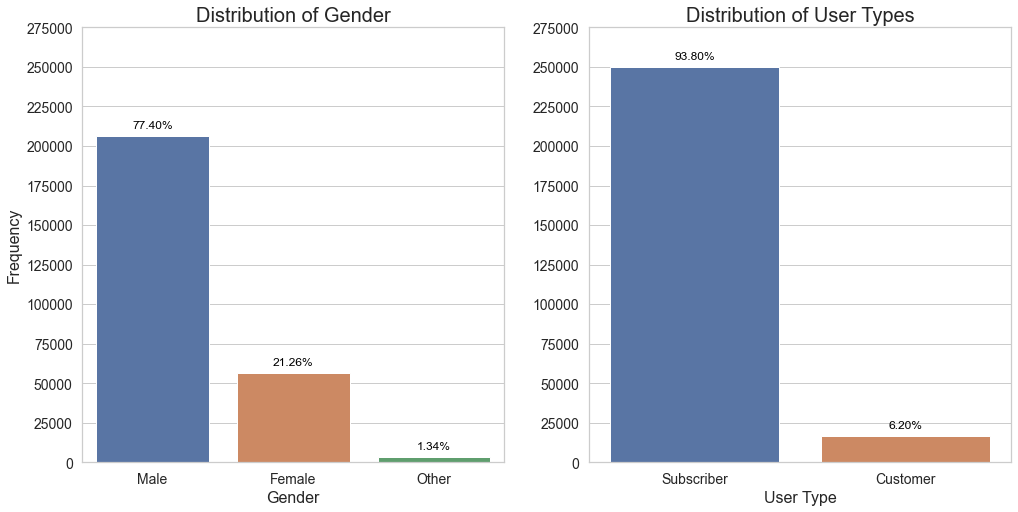

In [3]:
# plotting the Distribution of Gender and User Type
sb.set_theme(style="whitegrid")

plt.figure(figsize=[12,8])

counts_all = df.member_gender.count()
gend_counts = df.member_gender.value_counts()
gend_order = gend_counts.index

# First subplot to display the gender distribution
plt.subplot(1,2,1)
sb.countplot(data = df, x = "member_gender", order = gend_order)

locs, labels = plt.xticks()

# displaying the relative Distirbution of each value
for loc, label in zip(locs,labels):
    
    count = gend_counts[label.get_text()]
    pct_string = "{:0.2f}%".format(100*count/counts_all)
    
    plt.text(loc, count+5000, pct_string, ha = 'center', color = 'black')

    
# Setting the Tickrate
y_ticks = np.arange(0, 275001, 25000)
plt.ylim(0, 275000)
plt.yticks(y_ticks)

# Setting the y and x label
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Distribution of Gender", fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);


# Plotting the Distribution of User Types

counts_type_all = df.user_type.count()
type_counts = df.user_type.value_counts()
type_order = type_counts.index


# Second Subplot to display the distirbution of the user types
plt.subplot(1,2,2)
sb.countplot(data = df, x = "user_type", order=type_order)


locs, labels = plt.xticks()

# displaying the relative Distirbution of each value
for loc, label in zip(locs,labels):
    
    count = type_counts[label.get_text()]
    pct_string = "{:0.2f}%".format(100*count/counts_all)
    
    plt.text(loc, count+5000, pct_string, ha = 'center', color = 'black')


y_ticks = np.arange(0, 275001, 25000)


plt.xlabel("User Type", fontsize=16)
plt.ylim(0, 275000)
plt.yticks(y_ticks)
plt.ylabel("")
plt.title("Distribution of User Types", fontsize = 20)
plt.subplots_adjust(right=1.2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## Average Trip Duration over Weekday for each gender

> In average male users takes less minutes per trip than female or others. Usually male users need less than 10 minutes for their trip on workdays. Female users about 11 minutes. on weekends all genders take longer trips.

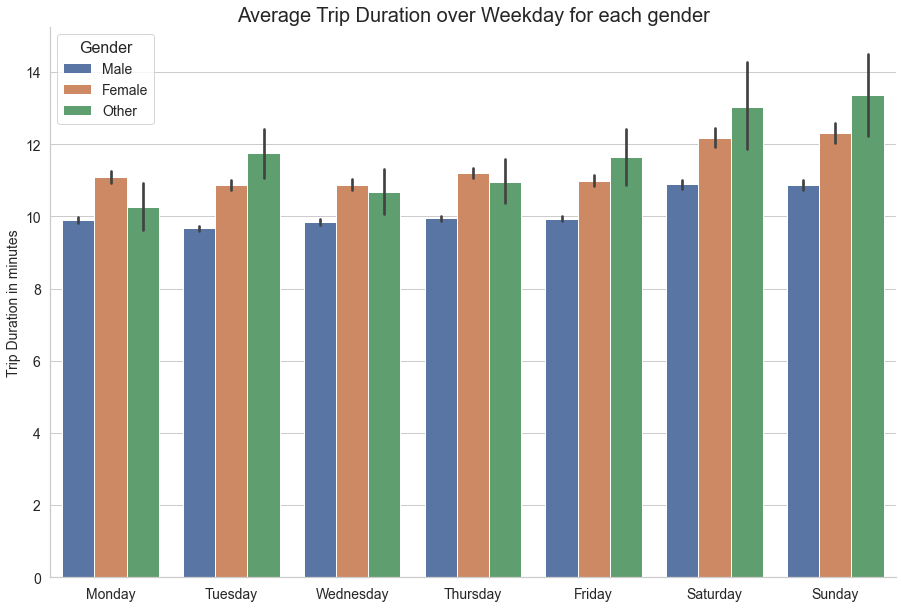

In [4]:
#prep to extract the weekdays of each bike sharing entry and saves it as a categorical object
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_cat = pd.api.types.CategoricalDtype(ordered=True, categories = days_order)

df.start_time = pd.to_datetime(df.start_time)
df["weekday"] = df.start_time.dt.day_name()
df["weekday"] = df["weekday"].astype(day_cat)

# ordering the hue value
hue_order = ["Male", "Female", "Other"]

# creating bar plot with the average trip duration of each weekday for each gender
sb.catplot(data = df, x="weekday", y="trip_duration_minutes", hue="member_gender", hue_order=hue_order,
           kind="bar", height=8.27, aspect = 1.5, legend_out = False)
plt.xlabel("")
plt.ylabel("Trip Duration in minutes", fontsize=14)
plt.legend(title = "Gender", fontsize=14, title_fontsize =16)
plt.title("Average Trip Duration over Weekday for each gender", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## Relative Distribtion of User Types over Weekday

> Subscribers are usually renting bikes on workdays. On weekends customers mainly take a ride with the bike sharing platform.

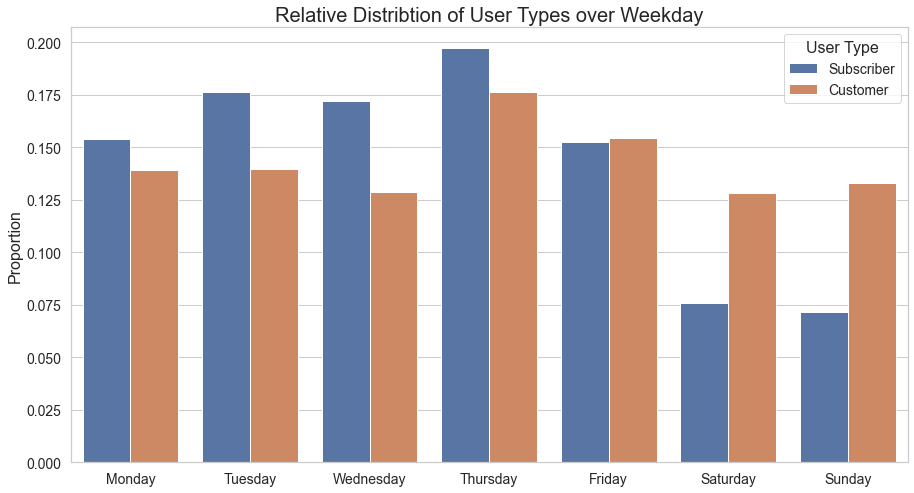

In [5]:
## Plotting the relative proportion of user types over weekday as a barplot
plt.figure(figsize=[15,8])

# declare all necessary variables of interest
x, y, hue = "weekday", "proportion", "user_type"
hue_order = ["Subscriber", "Customer"]

proportion_df = df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index()

sb.barplot(data=proportion_df, x=x, y=y, hue=hue, hue_order=hue_order)
plt.legend(title="User Type", fontsize=14, title_fontsize =16)
plt.xlabel("")
plt.ylabel("Proportion", fontsize=16)
plt.title("Relative Distribtion of User Types over Weekday", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## Average Trip Duration over Weekday for each User Type

> This chart shows a clearly difference between the user types in the usage of the bike sharing platforms. Subsribers usually take a ride about 10 mins on all weekdays. Customers are taking longer trips than subsribers. about 13 minutes in average on workdays and on weekends more than 17.5 minutes per trip.

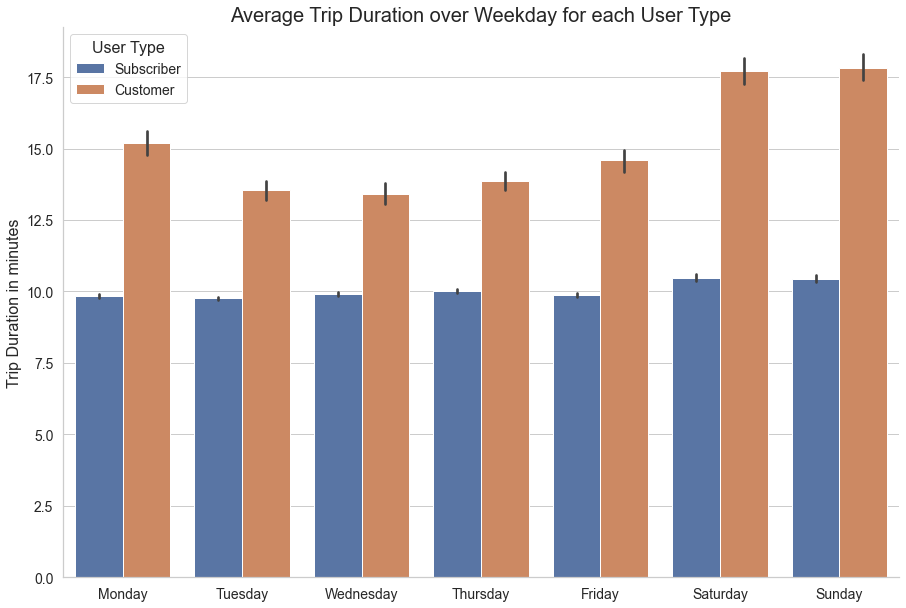

In [6]:
# # ordering the hue value: user type
hue_order = ["Subscriber", "Customer"]

# creating bar plot with the average trip duration of each daytime for each user type
sb.catplot(data = df, x="weekday", y="trip_duration_minutes", hue="user_type", hue_order = hue_order,
           kind="bar", height=8.27, aspect = 1.5, legend_out = False)
plt.xlabel("")
plt.ylabel("Trip Duration in minutes", fontsize=16)
plt.legend(title = "User Type", fontsize=14, title_fontsize =16)
plt.title("Average Trip Duration over Weekday for each User Type", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [10]:
# from a udacity forum entry - worked for the first time.
!jupyter nbconvert slide_deck_bike_sharing.ipynb --to slides --post serve  --no-input --no-prompt 

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 764974 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\KevinRyoShibata\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\KevinRyoShibata\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\KevinRyoShibata\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\KevinRyoShibata\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\KevinRyoSh